# Banking Fraud Detection Project

In [4]:
# IMPORT NECESSARY LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

In [5]:
# LOAD CSV

df = pd.read_csv("Banking_Fraud.csv")  
df.head(2)

,Transaction_ID,Customer_ID,Transaction_Amount,Transaction_Type,Transaction_Location,Transaction_Time,Device_Used,Account_Age,Credit_Score,Previous_Fraud,Is_Fraud
0,T1,C2539,8527.58,Deposit,"Hughesmouth, Mongolia",2025-01-20 03:17:34,Mobile,16,740,0,0
1,T2,C5318,9275.82,Deposit,"Huntville, Saint Pierre and Miquelon",2025-01-03 18:08:56,Web,5,848,0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Transaction_ID        10000 non-null  object 
 1   Customer_ID           10000 non-null  object 
 2   Transaction_Amount    10000 non-null  float64
 3   Transaction_Type      10000 non-null  object 
 4   Transaction_Location  10000 non-null  object 
 5   Transaction_Time      10000 non-null  object 
 6   Device_Used           10000 non-null  object 
 7   Account_Age           10000 non-null  int64  
 8   Credit_Score          10000 non-null  int64  
 9   Previous_Fraud        10000 non-null  int64  
 10  Is_Fraud              10000 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 859.5+ KB
None
       Transaction_Amount   Account_Age  Credit_Score  Previous_Fraud  \
count        10000.000000  10000.000000   10000.00000    10000.000000   
mean          

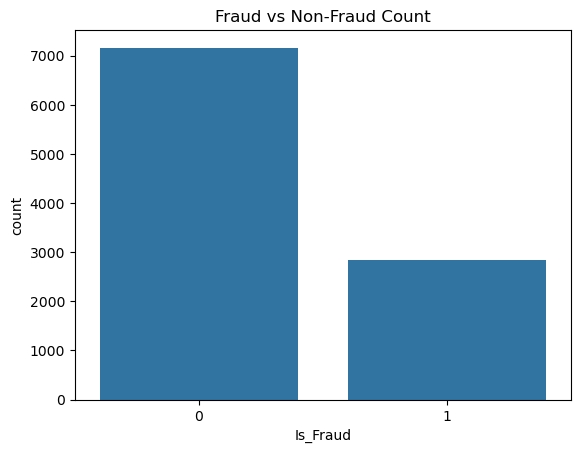

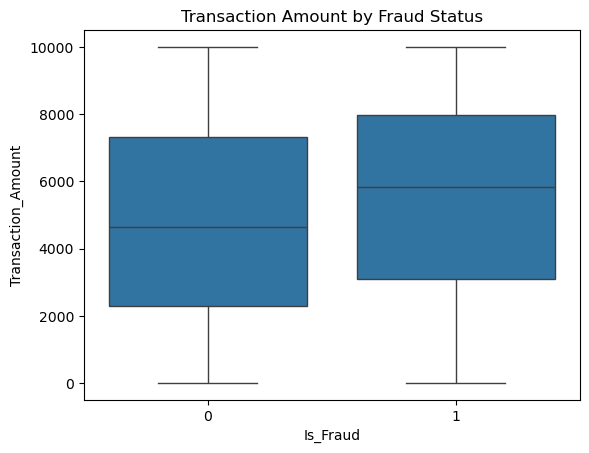

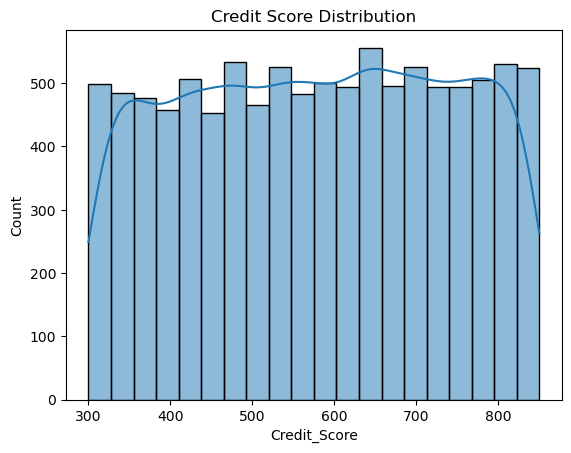

In [6]:
# EXPLORATORY DATA ANALYSIS

print(df.info())
print(df.describe())
print(df.isnull().sum())  

# Class distribution
sns.countplot(data=df, x='Is_Fraud')
plt.title('Fraud vs Non-Fraud Count')
plt.show()

# Boxplot of amount vs fraud
sns.boxplot(x='Is_Fraud', y='Transaction_Amount', data=df)
plt.title('Transaction Amount by Fraud Status')
plt.show()

# Histogram of credit score
sns.histplot(df['Credit_Score'], bins=20, kde=True)
plt.title('Credit Score Distribution')
plt.show()


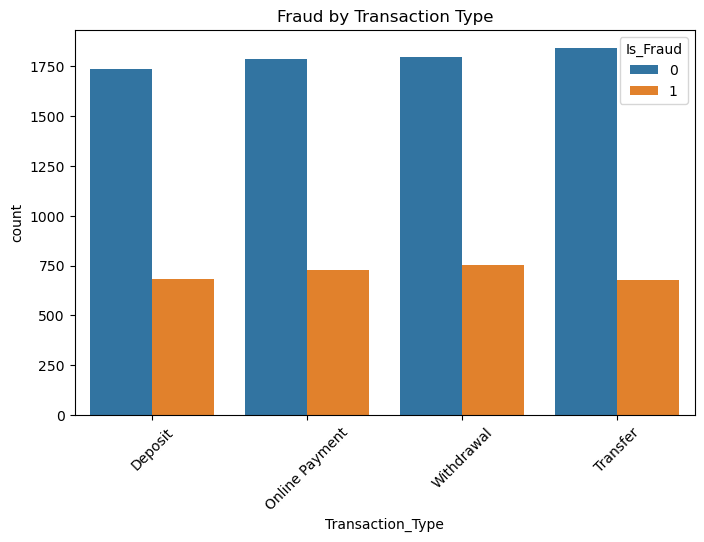

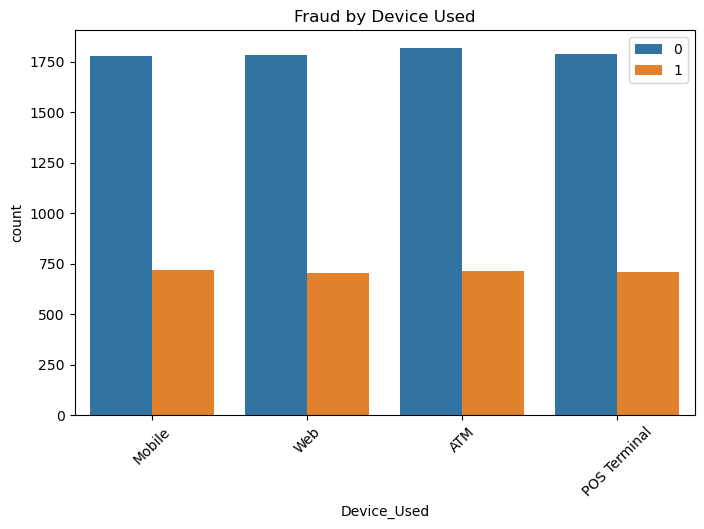

In [7]:
# Fraud by Transaction Type
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Transaction_Type', hue='Is_Fraud')
plt.title('Fraud by Transaction Type')
plt.xticks(rotation=45)
plt.show()

# Fraud by Device
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Device_Used', hue='Is_Fraud')
plt.title('Fraud by Device Used')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [8]:
# FEATURE ENGINEERING 
# Remove non-useful or non-numeric columns
df.drop(columns=['Transaction_Time'], inplace=True)

# Label Encoding for categorical columns
le = LabelEncoder()
df['Transaction_Type'] = le.fit_transform(df['Transaction_Type'])
df['Device_Used'] = le.fit_transform(df['Device_Used'])

# Group Credit Score
df['Credit_Score_Group'] = pd.cut(df['Credit_Score'], bins=[300, 600, 700, 800, 900], 
                                  labels=['Poor', 'Fair', 'Good', 'Excellent'])

# Convert grouped score to numeric
df['Credit_Score_Group'] = le.fit_transform(df['Credit_Score_Group'].astype(str))


Available Columns: ['Transaction_ID', 'Customer_ID', 'Transaction_Amount', 'Transaction_Type', 'Transaction_Location', 'Transaction_Time', 'Device_Used', 'Account_Age', 'Credit_Score', 'Previous_Fraud', 'Is_Fraud']


In [10]:
df.head(2)

,Transaction_ID,Customer_ID,Transaction_Amount,Transaction_Type,Transaction_Location,Device_Used,Account_Age,Credit_Score,Previous_Fraud,Is_Fraud,Credit_Score_Group
0,T1,C2539,8527.58,0,"Hughesmouth, Mongolia",1,16,740,0,0,2
1,T2,C5318,9275.82,0,"Huntville, Saint Pierre and Miquelon",3,5,848,0,1,0


In [16]:
# DATA SPLIT + SMOTE 

X = df.drop('Is_Fraud', axis=1)
y = df['Is_Fraud']

# Ensure all features are numeric before scaling
X = X.select_dtypes(include=[np.number])

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, stratify=y, random_state=42)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

X_scaled

Non-numeric columns in X: ['Transaction_ID', 'Customer_ID', 'Transaction_Type', 'Transaction_Location', 'Transaction_Time', 'Device_Used']


C:\Users\aswin\anaconda3\envs\clean_jupyter_env\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


array([[ 1.21107436,  0.92937416,  1.01646384, -1.0034058 ],
       [ 1.46777458, -0.98038201,  1.69689028, -1.0034058 ],
       [-0.95888716, -1.5012246 ,  0.2352335 ,  0.99660576],
       ...,
       [-0.08315804,  1.27660256,  0.44314157,  0.99660576],
       [-1.14844475, -0.11231102,  1.63388783,  0.99660576],
       [ 0.4238098 ,  0.92937416, -0.04197727, -1.0034058 ]])

In [14]:
# ML MODEL TRAINING 
model =LogisticRegression()
model.fit(X_train_res, y_train_res)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.6746666666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.66      0.74      2149
           1       0.45      0.72      0.56       851

    accuracy                           0.67      3000
   macro avg       0.65      0.69      0.65      3000
weighted avg       0.74      0.67      0.69      3000

Confusion Matrix:
 [[1412  737]
 [ 239  612]]


In [15]:
import sqlite3

# Load the dataset
df = pd.read_csv("Banking_Fraud.csv")

# Create an in-memory SQLite connection
conn = sqlite3.connect(':memory:')

# Load the DataFrame into SQLite as a table named 'transactions'
df.to_sql('transactions', conn, index=False, if_exists='replace')

# Perform SQL fraud analysis
query = """
SELECT 
    Transaction_Type,
    COUNT(*) AS Total_Transactions,
    SUM(CASE WHEN Is_Fraud = 1 THEN 1 ELSE 0 END) AS Fraud_Transactions,
    ROUND(100.0 * SUM(CASE WHEN Is_Fraud = 1 THEN 1 ELSE 0 END) / COUNT(*), 2) AS Fraud_Percentage
FROM transactions
GROUP BY Transaction_Type
ORDER BY Fraud_Percentage DESC;
"""

# Run and show results
fraud_analysis = pd.read_sql_query(query, conn)
fraud_analysis


,Transaction_Type,Total_Transactions,Fraud_Transactions,Fraud_Percentage
0,Withdrawal,2547,751,29.49
1,Online Payment,2517,730,29.00
2,Deposit,2420,682,28.18
3,Transfer,2516,675,26.83


### INSIGHTS

##s**

* The dataset is clean with no missing values and correct data types, requiring no additional preprocessing.
* Fraudulent transactions total nearly **30,000**, indicating a significant **class imbalance**, appropriately handled using **SMOTE**.
* **Withdrawal (29.49%)** and **Online Payment (29.00%)** are the transaction types with the highest fraud rates.
* Fraud is more common on **Mobile** and **ATM** devices, indicating these are higher-risk platforms.
* Most fraudulent transaction amounts range between **₹3,000 and ₹8,000**.
* Credit scores were segmented into categories like **Poor**, **Fair**, etc., for better model understanding.
* Label encoding and standard scaling were applied to prepare features for machine The Logistic Regression model performed well, achieving 67.47% accuracy and a high recall of 72% for fraud detection. It effectively identified most    fraudulent transactions.ms still present.
* SQL analysis confirms **Withdrawals and Online Payments** have the highest fraud counts and should be m*, or **PDF report**.
